#### import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from termcolor import colored
import scipy.stats

In [2]:
"""datasets"""

home = '/tudelft.net/staff-umbrella/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/Central_US/'
home_b = '/tudelft.net/staff-umbrella/rootzone/Benchmark_evaporation_products/'

LFE_monthly = xr.open_dataset(home_b + 'LandFlux-EVAL/Monthly/LandFluxEVAL.merged.89-05.monthly.all.nc' , engine = 'netcdf4')
SA = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012.nc' , engine = 'netcdf4')
DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_CU.nc' , engine = 'netcdf4')
FBP_monthly = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_CU.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_CU.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_CU.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_CU.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_CU.nc' , engine = 'netcdf4')

"""SOMO.ML"""

home = '/tudelft.net/staff-umbrella/rootzone/Benchmark_soilmoisture_products'

"""Monthly data"""

layer_01_2001_2012_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer1_2001_2012/SoMo.ml_v1_layer1_2001-2012_monthly_CU.nc' , engine = 'netcdf4')
layer_02_2001_2012_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer2_2001_2012/SoMo.ml_v1_layer2_2001-2012_monthly_CU.nc' , engine = 'netcdf4')
layer_03_2001_2012_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer3_2001_2012/SoMo.ml_v1_layer3_2001-2012_monthly_CU.nc' , engine = 'netcdf4')

"""Temperature data"""

home = '/tudelft.net/staff-umbrella/rootzone/GSWP3/Daily'


Tas = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat38.0to42.0lon-102.0to-98.0.nc4' , engine = 'netcdf4')
Tas_min = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat38.0to42.0lon-102.0to-98.0.nc4' , engine = 'netcdf4')
Tas_max = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat38.0to42.0lon-102.0to-98.0.nc4' , engine = 'netcdf4')

Tav = Tas.tas[: ,  : , :]
Tmax = Tas_max.tasmax[: , : , :]
Tmin = Tas_min.tasmin[: , : , :]

"""Preparing data"""

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly = DOLCE_v3_monthly * factor
UKESM1_0_LL = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg = EC_Earth3_veg.evspsbl * t_day
CESM2 = CESM2.evspsbl * t_day
CMCC_ESM2 = CMCC_ESM2.evspsbl * t_day
E3SM_1_1 = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR = IPSL_CM6A_LR.evspsbl * t_day
MIROC6 = MIROC6.evspsbl * t_day

L1 = np.zeros(120)
L2 = np.zeros(120)
L3 = np.zeros(120)

for i in range(120):
    L1[i] = layer_01_2001_2012_monthly.layer1[i , : , :].mean()
    L2[i] = layer_02_2001_2012_monthly.layer2[i , : , :].mean()
    L3[i] = layer_03_2001_2012_monthly.layer3[i , : , :].mean()

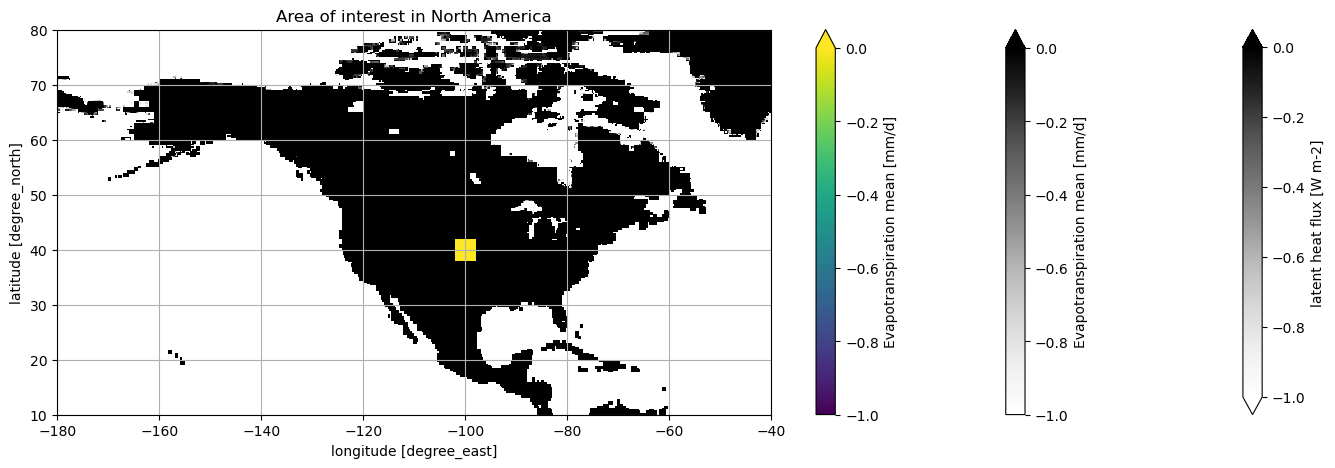

In [3]:
"""Lat: 8:12, Lon: 0:4""" 

plt.figure(figsize = (18 , 5))
SA.hfls[1 , : , :].plot(cmap = 'Greys' , vmin = -1 , vmax = 0)
LFE_monthly.ET_mean[1].plot(cmap = 'Greys' , vmin = -1 , vmax = 0)
LFE_monthly.ET_mean[1 , 128:132 , 78:82].plot(cmap = 'viridis' , vmin = -1 , vmax = 0)
plt.title(f'Area of interest in North America')
plt.ylim(10 , 80)
plt.xlim( -180 , -40)

plt.grid()

In [4]:
"""Mean of the area"""

t = 120  #2001 - 2010

dpm = [31, 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31]

dpm = np.array(dpm)
ET_mean_DOLCE_v3 = DOLCE_v3_monthly.hfls.mean(axis=(1, 2))[0:120] * dpm
ET_mean_FBP = FBP_monthly.Evaporation.mean(axis=(1, 2))[0:120] * dpm
ET_mean_UKESM1_0_LL = UKESM1_0_LL.mean(axis=(1, 2))[0:120] * dpm
ET_mean_EC_Earth3_veg = EC_Earth3_veg.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CESM2 = CESM2.mean(axis=(1, 2))[0:120] * dpm
ET_mean_CMCC_ESM2 = CMCC_ESM2.mean(axis=(1, 2))[0:120] * dpm
ET_mean_E3SM_1_1 = E3SM_1_1.mean(axis=(1, 2))[0:120] * dpm
ET_mean_HadGEM3_GC31_LL = HadGEM3_GC31_LL.mean(axis=(1, 2))[0:120] * dpm
ET_mean_IPSL_CM6A_LR = IPSL_CM6A_LR.mean(axis=(1, 2))[0:120] * dpm
ET_mean_MIROC6 = MIROC6.mean(axis=(1, 2))[0:120] * dpm

The average yearly precipitation is equal to: 618.76 mm


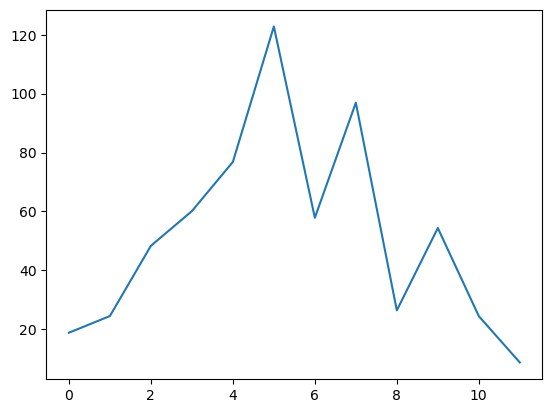

In [35]:
"""Precipitation data"""

home = '/tudelft.net/staff-umbrella/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_CU.nc' , engine = 'netcdf4')

P_mean = np.zeros(t)

for i in range(len(P_mean)):
    P_mean[i] = Prec_monthly_2001_2010.pr[i].mean() * t_day * dpm[i]
    
p_01_10 = np.sum(P_mean[0:12]) + np.sum(P_mean[12:24]) + np.sum(P_mean[24:36]) + np.sum(P_mean[36:48]) + np.sum(P_mean[48:60]) + np.sum(P_mean[60:72]) + np.sum(P_mean[72:84]) + np.sum(P_mean[84:96]) + np.sum(P_mean[96:108]) + np.sum(P_mean[108:120])
print(f'The average yearly precipitation is equal to: {p_01_10/10:.2f} mm')

plt.plot(P_mean[48:60]);

In [6]:
"""Storage S"""

models_S = ['S_DOLCE_v3', 'S_FBP', 'S_UKESM1_0_LL', 'S_EC_Earth3_veg', 'S_CESM2', 'S_CMCC_ESM2', 'S_E3SM_1_1', 'S_HadGEM3_GC31_LL', 'S_IPSL_CM6A_LR', 'S_MIROC6']

for model in models_S:
    exec(f"{model} = np.zeros(t)") #Initialize all models with zeros
    for i in range(t):
        exec(f"{model}[i] = {model}[i - 1] + (P_mean[i] - ET_mean_{model[2:]}[i])")
        if eval(f"{model}[i] > 0"):
            exec(f"{model}[i] = 0")

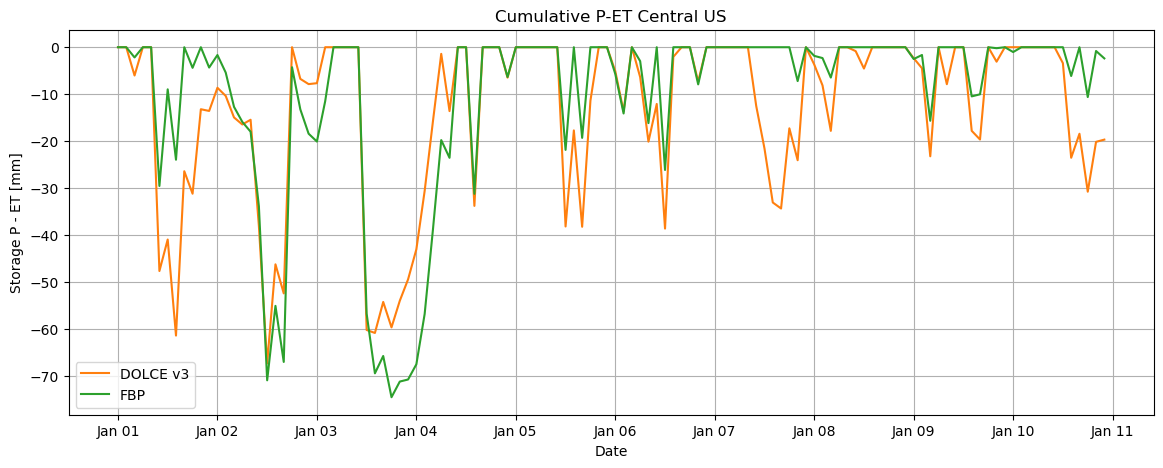

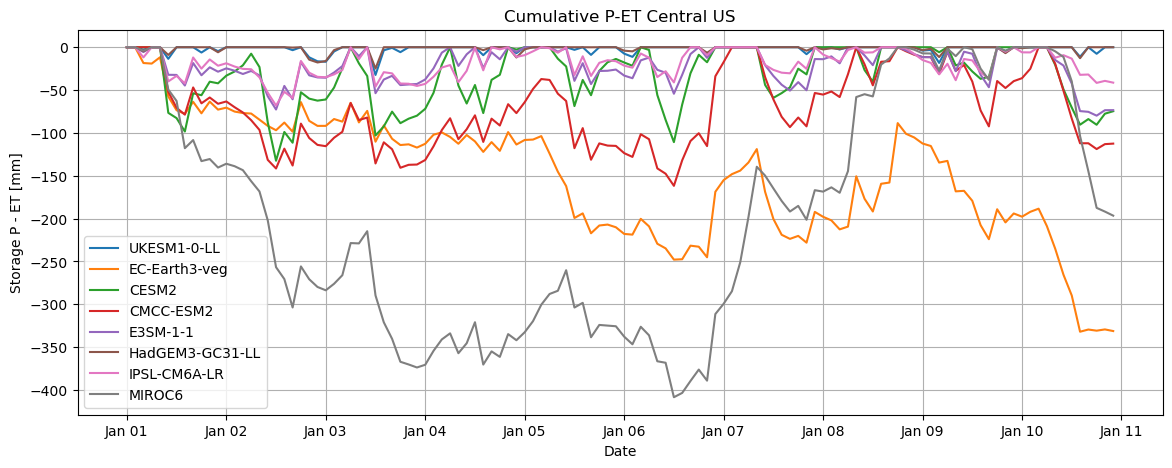

In [7]:
"""Benchmark products"""

plt.figure(figsize = (14 , 5))
plt.ylabel(r'$\int P - E $ [mm]')
#plt.plot(S1_LFE , label = 'Storage according to LFE')
plt.plot(S_DOLCE_v3 , label = 'DOLCE v3' , color= 'C1')
plt.plot(S_FBP , label = 'FBP' , color = 'C2')
plt.xticks(np.arange(0 , 121 , 12) , ['Jan 01' , 'Jan 02' ,'Jan 03' ,'Jan 04' ,'Jan 05' ,'Jan 06' ,'Jan 07' ,'Jan 08' ,'Jan 09' ,'Jan 10' , 'Jan 11'])
plt.xlabel('Date')
plt.title('Cumulative P-ET Central US')
plt.grid()
plt.legend();

S1 = [S_DOLCE_v3 , S_FBP, S_UKESM1_0_LL , S_EC_Earth3_veg , S_CESM2 ,  S_CMCC_ESM2 , S_E3SM_1_1 , S_HadGEM3_GC31_LL , S_IPSL_CM6A_LR , S_MIROC6]

"""LS3MIP"""

plt.figure(figsize = (14 , 5))
plt.ylabel(r'$\int P - E $ [mm]')
plt.plot(S_UKESM1_0_LL , label = 'UKESM1-0-LL')
plt.plot(S_EC_Earth3_veg , label = 'EC-Earth3-veg')
plt.plot(S_CESM2 , label = 'CESM2')
plt.plot(S_CMCC_ESM2 , label = 'CMCC-ESM2')
plt.plot(S_E3SM_1_1 , label = 'E3SM-1-1')
plt.plot(S_HadGEM3_GC31_LL , label = 'HadGEM3-GC31-LL')
plt.plot(S_IPSL_CM6A_LR , label = 'IPSL-CM6A-LR')
plt.plot(S_MIROC6 , label = 'MIROC6')
plt.xlabel('Date')
plt.title('Cumulative P-ET Central US')
plt.xticks(np.arange(0 , 121 , 12) , ['Jan 01' , 'Jan 02' ,'Jan 03' ,'Jan 04' ,'Jan 05' ,'Jan 06' ,'Jan 07' ,'Jan 08' ,'Jan 09' ,'Jan 10' , 'Jan 11'])
plt.grid()
plt.legend();

In [8]:
#Picking a dry year

print()
print(colored(f'The maximum decrease in storage between Autumn 2001 and Spring 2002' , 'blue'))

print('----' * 24)
print(f'The maximum decrease in storage in for  FBP             is equal to:           {S_FBP[0] - S_FBP[18]:.3f} mm')
print(f'The maximum decrease in storage in for  MIROC6          is equal to:           {S_MIROC6[0] - S_MIROC6[18]:.3f} mm')
print(f'The maximum decrease in storage in for  UKESM1_0_LL     is equal to:           {S_UKESM1_0_LL[0] - S_UKESM1_0_LL[18]:.3f} mm')
print(f'The maximum decrease in storage in for  CESM2           is equal to:           {S_CESM2[0] - S_CESM2[18]:.3f} mm')
print(f'The maximum decrease in storage in for  HadGEM-GC31-LL  is equal to:           {S_HadGEM3_GC31_LL[0] - S_HadGEM3_GC31_LL[18]:.3f} mm')
print(f'The maximum decrease in storage in for  DOLCE v3        is equal to:           {S_DOLCE_v3[0] - S_DOLCE_v3[18]:.3f} mm')
print(f'The maximum decrease in storage in for  EC_Earth3_veg   is equal to:           {S_EC_Earth3_veg[0] - S_EC_Earth3_veg[18]:.3f} mm')
print(f'The maximum decrease in storage in for  CMCC-ESM2       is equal to:           {S_CMCC_ESM2[0] - S_CMCC_ESM2[18]:.3f} mm')
print(f'The maximum decrease in storage in for  E3SM-1-1        is equal to:           {S_E3SM_1_1[0] - S_E3SM_1_1[18]:.3f} mm')
print(f'The maximum decrease in storage in for  IPSL-CM6A-LR    is equal to:           {S_IPSL_CM6A_LR[0] - S_IPSL_CM6A_LR[18]:.3f} mm')

print('----' * 24)


The maximum decrease in storage between Autumn 2001 and Spring 2002
------------------------------------------------------------------------------------------------
The maximum decrease in storage in for  FBP             is equal to:           70.876 mm
The maximum decrease in storage in for  MIROC6          is equal to:           256.689 mm
The maximum decrease in storage in for  UKESM1_0_LL     is equal to:           0.114 mm
The maximum decrease in storage in for  CESM2           is equal to:           132.481 mm
The maximum decrease in storage in for  HadGEM-GC31-LL  is equal to:           0.000 mm
The maximum decrease in storage in for  DOLCE v3        is equal to:           67.273 mm
The maximum decrease in storage in for  EC_Earth3_veg   is equal to:           96.872 mm
The maximum decrease in storage in for  CMCC-ESM2       is equal to:           141.521 mm
The maximum decrease in storage in for  E3SM-1-1        is equal to:           72.694 mm
The maximum decrease in storage 

In [9]:
"""P - ET per month"""

model_P_ET = ['P_ET_DOLCE_v3', 'P_ET_FBP', 'P_ET_UKESM1_0_LL', 'P_ET_EC_Earth3_veg', 'P_ET_CESM2', 'P_ET_CMCC_ESM2', 'P_ET_E3SM_1_1', 'P_ET_HadGEM3_GC31_LL', 'P_ET_IPSL_CM6A_LR', 'P_ET_MIROC6']

for model in model_P_ET:
    exec(f"{model} = np.zeros(t)") #Initialize all models with zeros
    for i in range(t):
        exec(f"{model}[i] = {model}[i - 1] + (P_mean[i] - ET_mean_{model[5:]}[i])")
        if eval(f"{model}[i] > 0"):
            exec(f"{model}[i] = 0")

In [10]:
"""P - ET response anomolies"""


"""Precipitation"""

P_pm_mean = np.zeros(12)
P_an = np.zeros(120)
mpy = np.arange(0 , 120 , 12)

for i in range(12):
    #Array per month average
    P_pm_mean[i] = np.mean([P_mean[i] , P_mean[i + 12] , P_mean[i + 24] ,  P_mean[i+36] , 
    P_mean[i + 48] , P_mean[i + 60] , P_mean[i + 72] , P_mean[i + 84] , P_mean[i + 96] , 
    P_mean[i + 108]])
    
for j in range(len(mpy)):   
    for i in range(12):
        P_an[mpy[j] + i] = P_mean[mpy[j]+i] - P_pm_mean[i]


"""Evapotranspiration"""

ET_mean = [ET_mean_DOLCE_v3 , ET_mean_FBP, ET_mean_UKESM1_0_LL , ET_mean_EC_Earth3_veg , ET_mean_CESM2 ,  ET_mean_CMCC_ESM2 , ET_mean_E3SM_1_1 , ET_mean_HadGEM3_GC31_LL , ET_mean_IPSL_CM6A_LR , ET_mean_MIROC6]
ET_pm_mean = np.zeros((10 , 12))

for j in range(len(ET_mean)):
    for i in range(12):
        #Array per month average
        ET_pm_mean[j , i] = np.mean([ET_mean[j][i] , ET_mean[j][i + 12] , ET_mean[j][i + 24] ,  ET_mean[j][i+36] , 
        ET_mean[j][i + 48] , ET_mean[j][i + 60] , ET_mean[j][i + 72] , ET_mean[j][i + 84] , ET_mean[j][i + 96] , 
        ET_mean[j][i + 108]])

ET_an = np.zeros((10 , 120))
mpy = np.arange(0 , 120 , 12)

for m in range(len(ET_mean)):
    for j in range(len(mpy)):   
        for i in range(12):
            ET_an[m][mpy[j] + i] = ET_mean[m][mpy[j]+i] - ET_pm_mean[m][i]

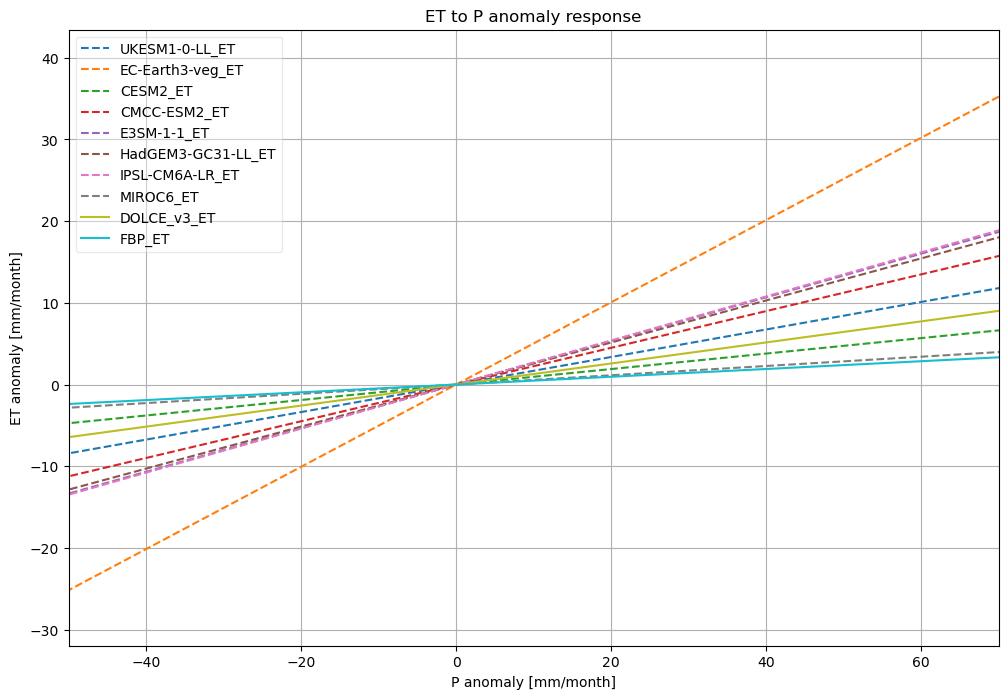

In [11]:
"""Linear function"""

d = {'P_mean': P_an, 'UKESM1-0-LL_ET' : ET_an[2] , 'EC-Earth3-veg_ET' : ET_an[3] , 'CESM2_ET' : ET_an[4] , 'CMCC-ESM2_ET':ET_an[5] 
     ,'E3SM-1-1_ET':ET_an[6] , 'HadGEM3-GC31-LL_ET' : ET_an[7] , 'IPSL-CM6A-LR_ET':ET_an[8] , 'MIROC6_ET':ET_an[9] , 'DOLCE_v3_ET' : ET_an[0]
     , 'FBP_ET':ET_an[1]}
df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])

def func(x, a , b):
    return a * x + b

label = ['UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET' , 'DOLCE_v3_ET' , 'FBP_ET']
y = df['UKESM1-0-LL_ET'] , df['EC-Earth3-veg_ET'] , df['CESM2_ET'] , df['CMCC-ESM2_ET'] , df['E3SM-1-1_ET'] , df['HadGEM3-GC31-LL_ET'], df['IPSL-CM6A-LR_ET'] , df['MIROC6_ET'] , df['DOLCE_v3_ET'] , df['FBP_ET']
linestyle = ['dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'solid' , 'solid']
S = np.zeros(len(label))
a = np.zeros(len(label))

plt.figure(figsize = (12 , 8))

for i in range(len(label)):
    xdata = df['P_mean']
    ydata = y[i]
    popt , pcov  = curve_fit(func , xdata, ydata)
    plt.plot(xdata , func(xdata, *popt) , label = label[i] , linestyle = linestyle[i]);
    S[i] = func(xdata[0] , *popt)
    a[i] = popt[0]


plt.title('ET to P anomaly response')
plt.xlim(0 , 6)
plt.grid()
plt.xlim(-50 , 70)
plt.ylabel('ET anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.legend(framealpha = 0.4);

------------------------------------------------
Climate Model
------------------------------------------------
The mean monthly ET is: 33.054 from UKESM1-0-LL
The mean monthly ET is: 54.064 from EC-Earth3-veg
The mean monthly ET is: 43.863 from CESM2
The mean monthly ET is: 49.030 from CMCC-ESM2
The mean monthly ET is: 46.821 from E3SM-1-1
The mean monthly ET is: 32.183 from HadGEM3-GC31-LL
The mean monthly ET is: 47.440 from IPSL-CM6A-LR
The mean monthly ET is: 50.936 from MIROC6
------------------------------------------------
Benchmark product
------------------------------------------------
The mean monthly ET is: 42.826 from DOLCE v3
The mean monthly ET is: 38.622 from FBP



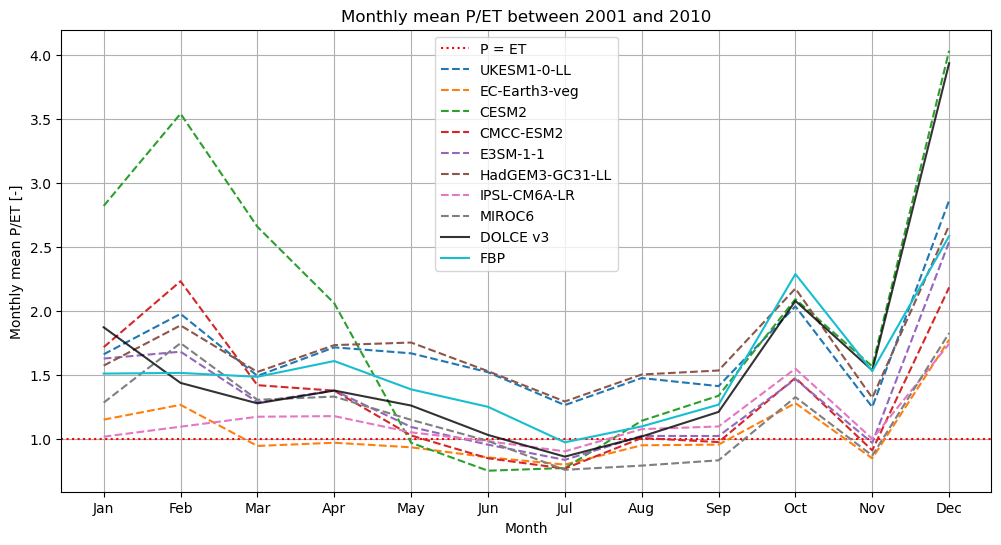

In [12]:
"""Comparing yearly P/ET for every model"""

label = ['DOLCE_v3' , 'FBP' , 'UKESM1-0-LL' , 'EC-Earth3-veg' , 'CESM2' , 'CMCC-ESM2' , 'E3SM-1-1' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']

plt.figure(figsize= (12 ,6))
plt.axhline(y = 1 , xmin = 0 , xmax = 1 , color = 'red' , linestyle = 'dotted' , alpha = 1 , label = 'P = ET')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Monthly mean P/ET [-]')
plt.title('Monthly mean P/ET between 2001 and 2010')

for i in range(2 , 10):
    plt.plot(P_pm_mean/ET_pm_mean[i] , label = label[i] , linestyle = 'dashed')

plt.plot(P_pm_mean/ET_pm_mean[0] , label = 'DOLCE v3' , color = 'k' , alpha = 0.8)
plt.plot(P_pm_mean/ET_pm_mean[1] , label = 'FBP' , color = 'C9')
#plt.plot(P_pm_mean , 'bd-' , label = 'GWSP3 P', alpha = 0.4)
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])

plt.legend();

"""Average state of ET"""

print('----' * 12)
print('Climate Model')
print('----' * 12)

for i in range(2 , 10):
    print(f'The mean monthly ET is: {ET_pm_mean[i].mean():.3f} from {label[i]}')

print('----' * 12)
print('Benchmark product')
print('----' * 12)
print(f'The mean monthly ET is: {ET_pm_mean[0].mean():.3f} from DOLCE v3')
print(f'The mean monthly ET is: {ET_pm_mean[1].mean():.3f} from FBP')
print()

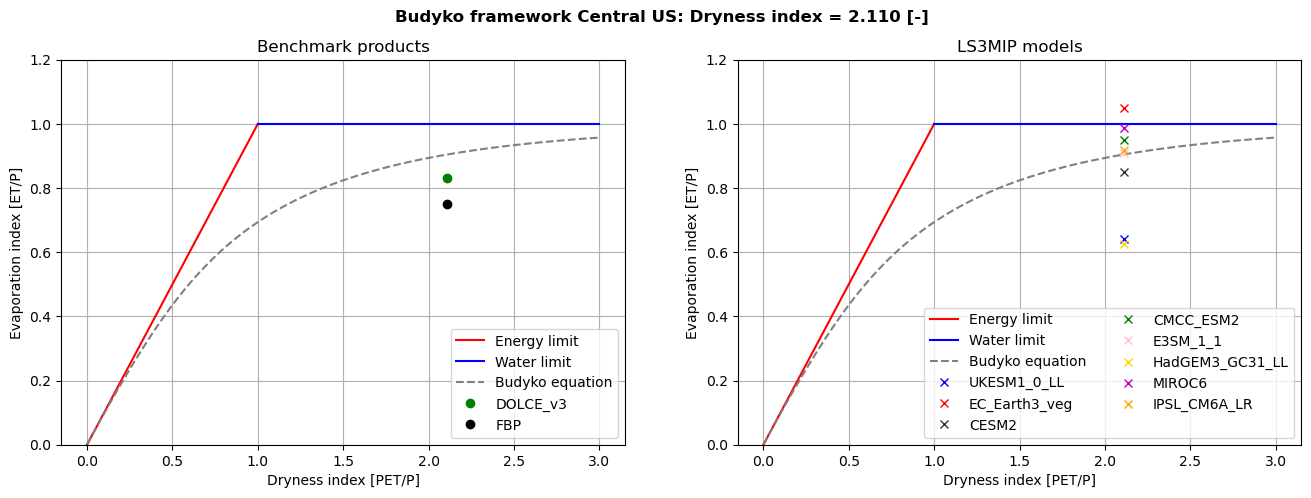

In [13]:
"""EP_0"""

def EP_HS(J, lat ,Tmax,Tmin,Tav):
    # extraterrestrial radation
    G = 0.0820  #MJ m^-2 min^-1
    phi = lat/360 * (2*np.pi) #rad
    d = 1 + 0.033 * np.cos(0.0172 * J) #[-]
    delta = 0.409 * np.sin(0.0172 * J - 1.39) #rad
    w = np.arccos(-np.tan(phi)*np.tan(delta)) #rad
    Re = (24*60)/np.pi * G * d * (w*np.sin(phi)*np.sin(delta) + np.cos(phi)*np.cos(delta)*np.sin(w)) #MJ m^-2 d^-1
    
    # Hargreaves and Samani EP
    labda = 2.45 # MJ kg^-1
    alpha = 0.0023
    Ep = (1/labda) * alpha * Re * (Tav + 17.8) * np.sqrt(Tmax-Tmin) #convert to mm
    if(Ep<0):
        Ep=0
    return(Ep)

EP_0 = np.zeros(365)

for i in range(365):
    EP_0[i] = EP_HS(i+1 , -14 , Tmax[i , : , :].mean()-273.15 , Tmin[i , : , :].mean()-273.15 , Tav[i , : , :].mean()-273.15) * (365.2 / 12)

"""Budyko framework"""

x = [0 , 1]
y = [0 , 1]
y2 = [1 , 1]
x2 = [1 , 3]

plt.figure(figsize = (16 , 5))
plt.subplot(121)
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')


"""Budyko equation"""

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')

"""Models"""

plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_DOLCE_v3.mean()/ P_mean.mean() , 'go' , label = 'DOLCE_v3')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_FBP.mean()/ P_mean.mean() , 'ko' , label = 'FBP')

plt.xlabel('Dryness index [PET/P]')
plt.ylabel('Evaporation index [ET/P]')
plt.title('Benchmark products')
plt.grid()
plt.legend()
plt.ylim(0 , 1.2)

plt.subplot(122)
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')

plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_UKESM1_0_LL.mean()/ P_mean.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_EC_Earth3_veg.mean()/ P_mean.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_CESM2.mean()/ P_mean.mean() , 'kx' , label = 'CESM2' , alpha = 0.8)
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_CMCC_ESM2.mean()/ P_mean.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = 'CMCC_ESM2')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_E3SM_1_1.mean()/ P_mean.mean() ,linestyle = (0 , (0 , 100)), color = 'pink' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_HadGEM3_GC31_LL.mean()/ P_mean.mean() , linestyle = (0 , (0 , 100)) , color = 'gold' , marker = 'x' , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_MIROC6.mean()/ P_mean.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_IPSL_CM6A_LR.mean()/ P_mean.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL_CM6A_LR')

plt.xlabel('Dryness index [PET/P]')
plt.ylabel('Evaporation index [ET/P]')
plt.title('LS3MIP models')
plt.suptitle(f'Budyko framework Central US: Dryness index = {EP_0.mean()/P_mean.mean():.3f} [-]' , fontweight = 'bold')
plt.grid()
plt.ylim(0 , 1.2)
plt.legend(ncols = 2);

-----------------------------------------------------------------------------------------------
The maximum decrease in storage in 2003/2004                 is equal to:           37.642 mm
The decrease in layer 1 (0 - 10 cm)                          is equal to:           6.261 mm
The decrease in layer 1 (10 - 30 cm)                         is equal to:           17.471 mm
The decrease in layer 1 (30 - 50 cm)                         is equal to:           13.909 mm
-----------------------------------------------------------------------------------------------


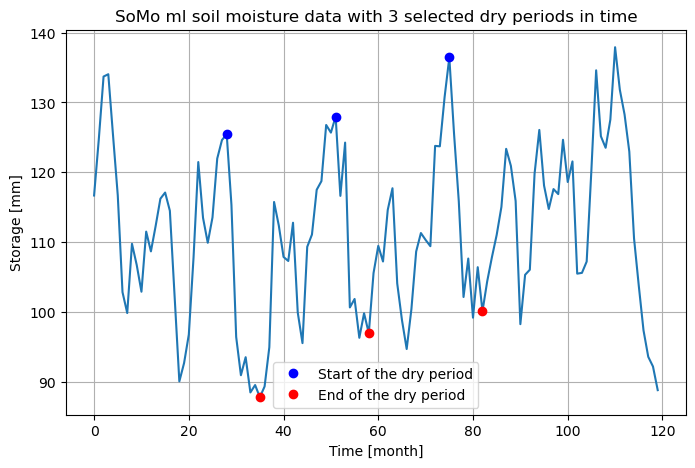

In [14]:
#Picking some dry periods

Storage = L1 * 0.1 + L2 * 0.2 + L3 * 0.2
Storage = Storage * 1000 #convert to mm


plt.figure(figsize = (8 , 5))

plt.plot(Storage)
plt.plot(28 , Storage[28] , 'bo' , label = 'Start of the dry period')
plt.plot(35 , Storage[35] , 'ro' , label = 'End of the dry period')

plt.plot(51 , Storage[51] , 'bo')
plt.plot(58 , Storage[58] , 'ro')

plt.plot(75 , Storage[75] , 'bo')
plt.plot(82 , Storage[82] , 'ro')



plt.grid()

plt.legend()
plt.title('SoMo ml soil moisture data with 3 selected dry periods in time')
plt.ylabel('Storage [mm]')
plt.xlabel('Time [month]')

print('-----' * 19)
print(f'The maximum decrease in storage in 2003/2004                 is equal to:           {Storage[28] - Storage[35]:.3f} mm')
print(f'The decrease in layer 1 (0 - 10 cm)                          is equal to:           {(L1[28] - L1[35])*100:.3f} mm')
print(f'The decrease in layer 1 (10 - 30 cm)                         is equal to:           {(L2[28] - L2[35])*200:.3f} mm')
print(f'The decrease in layer 1 (30 - 50 cm)                         is equal to:           {(L3[28] - L3[35])*200:.3f} mm')
print('-----' * 19)

In [15]:
"""For the year 2003"""

'For the year 2003'

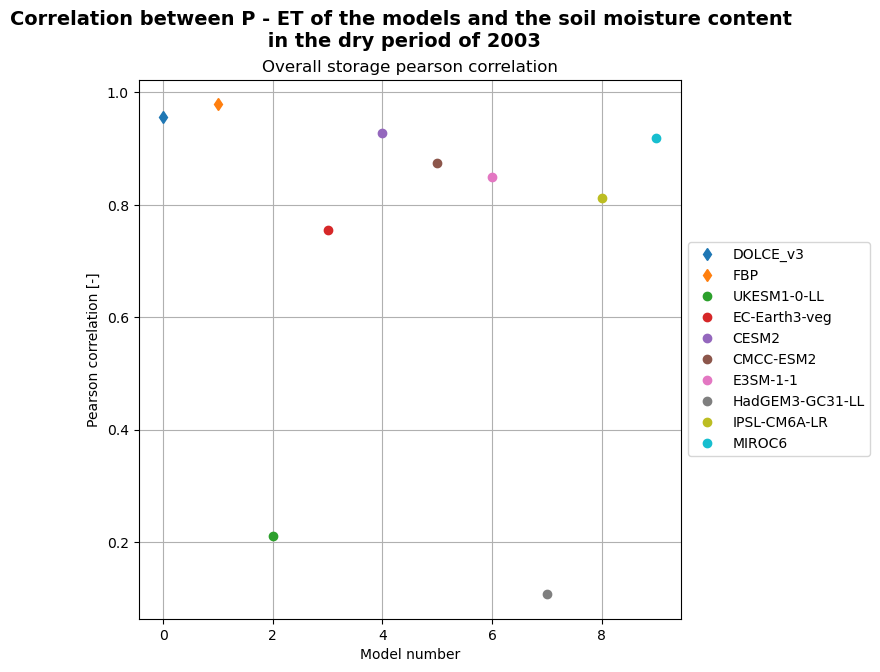

In [16]:
plt.figure(figsize = (7 , 7))

label = ['DOLCE_v3' , 'FBP' ,'UKESM1-0-LL' , 'EC-Earth3-veg' , 'CESM2' , 'CMCC-ESM2' , 'E3SM-1-1' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']
S = [S_DOLCE_v3 , S_FBP , S_UKESM1_0_LL  , S_EC_Earth3_veg , S_CESM2, S_CMCC_ESM2 , S_E3SM_1_1 , S_HadGEM3_GC31_LL , S_IPSL_CM6A_LR , S_MIROC6]
marker = ['d' , 'd' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o']

for i in range(len(models_S)):
    x = S[i][28:35]
    y = Storage[28:35]
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Overall storage pearson correlation')
plt.ylabel('Pearson correlation [-]')
plt.xlabel('Model number')
plt.grid()

plt.suptitle('Correlation between P - ET of the models and the soil moisture content\n in the dry period of 2003' , fontsize = 14 ,fontweight = 'bold');

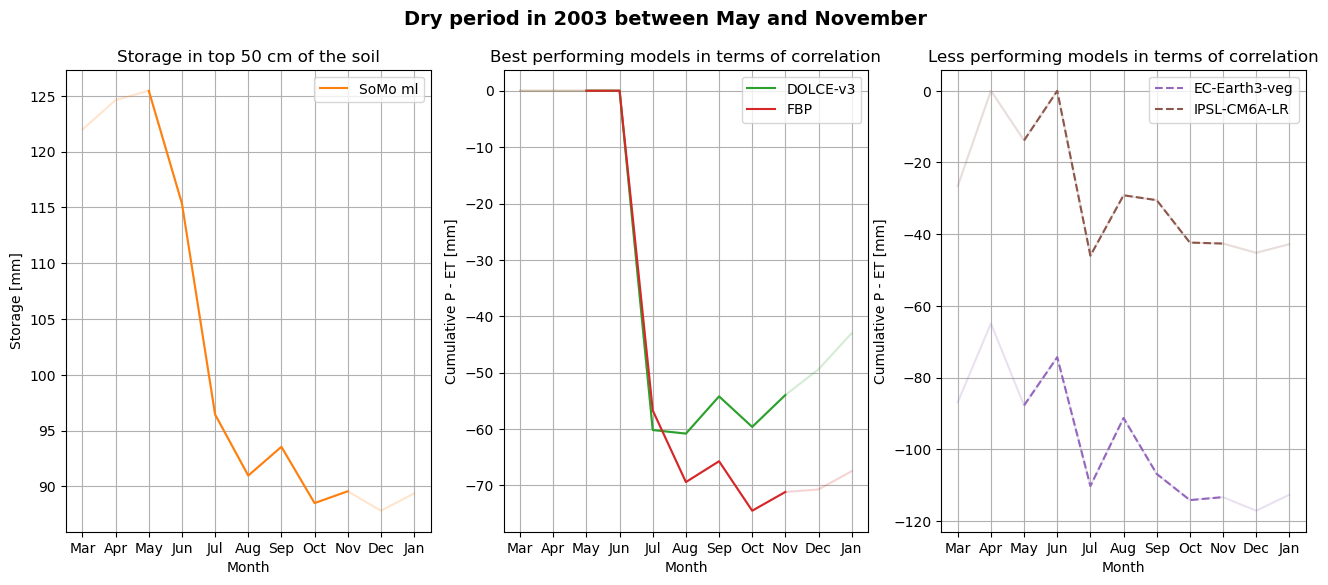

In [17]:
plt.figure(figsize = (16 , 6))

plt.subplot(131)
plt.plot(Storage[26:37] , color = 'C1' , alpha = 0.2)
plt.plot([2, 3 , 4 , 5 , 6 , 7 , 8] , Storage[28:35] , color = 'C1' , label = 'SoMo ml')
plt.title('Storage in top 50 cm of the soil')
plt.xlabel('Month')
plt.ylabel('Storage [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10] , ['Mar' , 'Apr' , 'May' , 'Jun', 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan'])
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(S_DOLCE_v3[26:37] , color = 'C2' , alpha = 0.2)
plt.plot(S_FBP[26:37] , color = 'C3' , alpha = 0.2)
plt.plot([2 , 3 ,4 , 5 , 6 , 7 , 8] , S_DOLCE_v3[28:35] , color = 'C2' , label = 'DOLCE-v3')
plt.plot([2 , 3 , 4 , 5 , 6 , 7 , 8] , S_FBP[28:35] , color = 'C3' , label = 'FBP')
plt.title('Best performing models in terms of correlation')
plt.ylabel(r'$\int P - E $ [mm]')
plt.xlabel('Month')
#plt.ylim(0.1 , -1.8)
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10] , ['Mar' , 'Apr' , 'May' , 'Jun', 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan'])
plt.grid()
plt.legend()

plt.subplot(133)

plt.plot(S_EC_Earth3_veg[26:37] , color = 'C4' , alpha = 0.2)
plt.plot(S_IPSL_CM6A_LR[26:37] , color = 'C5' , alpha = 0.2)
plt.plot([2 , 3,4 , 5 , 6 , 7 , 8] , S_EC_Earth3_veg[28:35] , color = 'C4' , label = 'EC-Earth3-veg' , linestyle = 'dashed')
plt.plot([2 , 3,4 , 5 , 6 , 7 , 8] , S_IPSL_CM6A_LR[28:35] , color = 'C5' , label = 'IPSL-CM6A-LR' , linestyle = 'dashed')
plt.title('Less performing models in terms of correlation')
plt.ylabel(r'$\int P - E $ [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10] , ['Mar' , 'Apr' , 'May' , 'Jun', 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan'])
plt.xlabel('Month')
plt.grid()
plt.legend();

plt.suptitle('Dry period in 2003 between May and November', fontsize = 14 ,fontweight = 'bold');
print()

In [18]:
print(f'The maximum decrease in storage in 2003')

print('----' * 24)
print(colored(f'The maximum decrease in for  MIROC6          is equal to:           {S_MIROC6[28] - S_MIROC6[35]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in for  EC_Earth3_veg   is equal to:           {S_EC_Earth3_veg[28] - S_EC_Earth3_veg[35]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in for  UKESM1_0_LL     is equal to:           {S_UKESM1_0_LL[28] - S_UKESM1_0_LL[35]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in for  CESM2           is equal to:           {S_CESM2[28] - S_CESM2[35]:.3f} mm' , 'green'))
print(colored(f'The maximum decrease in for  E3SM-1-1        is equal to:           {S_E3SM_1_1[28] - S_E3SM_1_1[35]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in for  CMCC-ESM2       is equal to:           {S_CMCC_ESM2[28] - S_CMCC_ESM2[35]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in for  HadGEM3-GC31-LL is equal to:           {S_HadGEM3_GC31_LL[28] - S_HadGEM3_GC31_LL[35]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in for  IPSL-CM6A-LR    is equal to:           {S_IPSL_CM6A_LR[28] - S_IPSL_CM6A_LR[35]:.3f} mm' , 'yellow'))
print('----' * 24)
print(colored(f'The maximum decrease for  FBP                is equal to:           {S_FBP[28] - S_FBP[35]:.3f} mm' , 'green'))
print(colored(f'The maximum decrease for  DOLCE v3           is equal to:           {S_DOLCE_v3[28] - S_DOLCE_v3[35]:.3f} mm' , 'green'))
print('----' * 24)
print()

The maximum decrease in storage in 2003
------------------------------------------------------------------------------------------------
The maximum decrease in for  MIROC6          is equal to:           144.782 mm
The maximum decrease in for  EC_Earth3_veg   is equal to:           29.365 mm
The maximum decrease in for  UKESM1_0_LL     is equal to:           0.000 mm
The maximum decrease in for  CESM2           is equal to:           60.995 mm
The maximum decrease in for  E3SM-1-1        is equal to:           32.447 mm
The maximum decrease in for  CMCC-ESM2       is equal to:           51.881 mm
The maximum decrease in for  HadGEM3-GC31-LL is equal to:           0.000 mm
The maximum decrease in for  IPSL-CM6A-LR    is equal to:           31.331 mm
------------------------------------------------------------------------------------------------
The maximum decrease for  FBP                is equal to:           70.704 mm
The maximum decrease for  DOLCE v3           is equal to:        

/home/pdenblaauwen/miniconda3/envs/ewatercycle/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


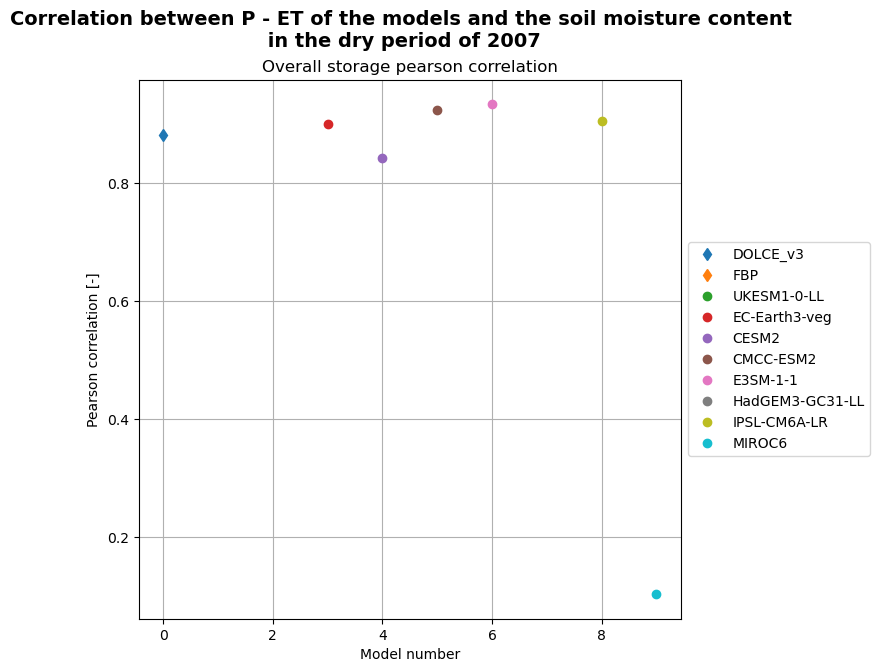

In [19]:
"""For the year 2007"""

plt.figure(figsize = (7 , 7))

label = ['DOLCE_v3' , 'FBP' ,'UKESM1-0-LL' , 'EC-Earth3-veg' , 'CESM2' , 'CMCC-ESM2' , 'E3SM-1-1' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']
S = [S_DOLCE_v3 , S_FBP , S_UKESM1_0_LL  , S_EC_Earth3_veg , S_CESM2, S_CMCC_ESM2 , S_E3SM_1_1 , S_HadGEM3_GC31_LL , S_IPSL_CM6A_LR , S_MIROC6]
marker = ['d' , 'd' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o']

for i in range(len(models_S)):
    x = S[i][75:82]
    y = Storage[75:82]
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Overall storage pearson correlation')
plt.ylabel('Pearson correlation [-]')
plt.xlabel('Model number')
plt.grid()

plt.suptitle('Correlation between P - ET of the models and the soil moisture content\n in the dry period of 2007' , fontsize = 14 ,fontweight = 'bold');

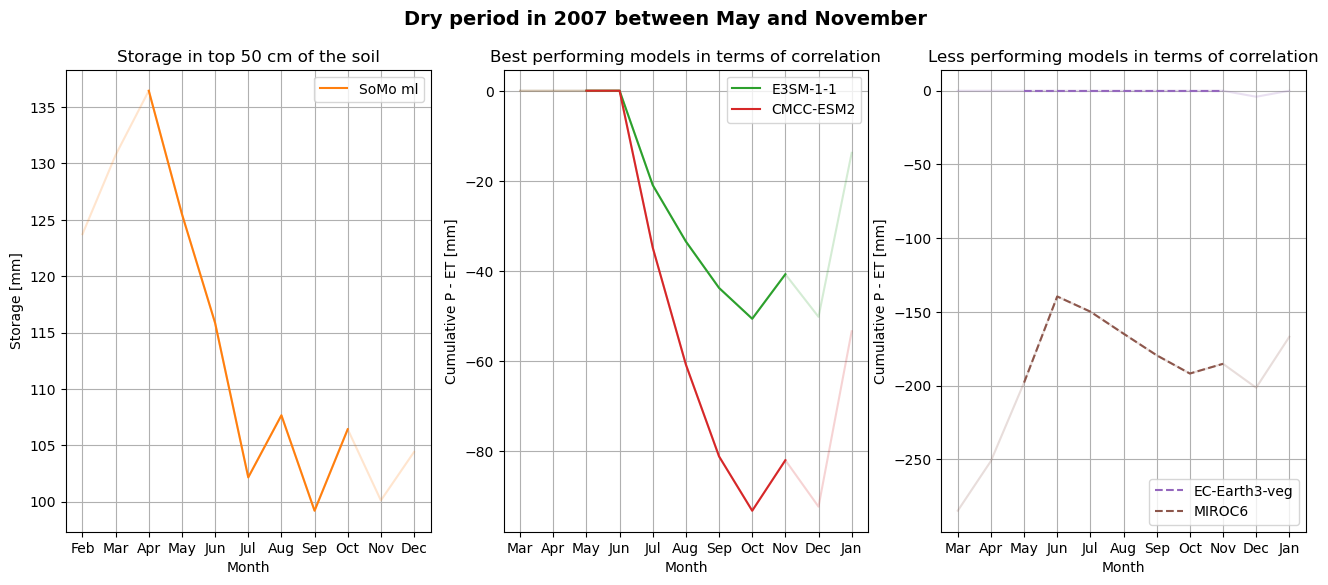

In [20]:
plt.figure(figsize = (16 , 6))

plt.subplot(131)
plt.plot(Storage[73:84] , color = 'C1' , alpha = 0.2)
plt.plot([2, 3 , 4 , 5 , 6 , 7 , 8] , Storage[75:82] , color = 'C1' , label = 'SoMo ml')
plt.title('Storage in top 50 cm of the soil')
plt.xlabel('Month')
plt.ylabel('Storage [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10] , ['Feb' , 'Mar' , 'Apr' , 'May' , 'Jun', 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(S_E3SM_1_1[73:84] , color = 'C2' , alpha = 0.2)
plt.plot(S_CMCC_ESM2[73:84] , color = 'C3' , alpha = 0.2)
plt.plot([2 , 3 ,4 , 5 , 6 , 7 , 8] , S_E3SM_1_1[75:82] , color = 'C2' , label = 'E3SM-1-1')
plt.plot([2 , 3 , 4 , 5 , 6 , 7 , 8] , S_CMCC_ESM2[75:82] , color = 'C3' , label = 'CMCC-ESM2')
plt.title('Best performing models in terms of correlation')
plt.ylabel(r'$\int P - E $ [mm]')
plt.xlabel('Month')
#plt.ylim(0.1 , -1.8)
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10] , ['Mar' , 'Apr' , 'May' , 'Jun', 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan'])
plt.grid()
plt.legend()

plt.subplot(133)

plt.plot(S_HadGEM3_GC31_LL[73:84] , color = 'C4' , alpha = 0.2)
plt.plot(S_MIROC6[73:84] , color = 'C5' , alpha = 0.2)
plt.plot([2 , 3,4 , 5 , 6 , 7 , 8] , S_HadGEM3_GC31_LL[75:82] , color = 'C4' , label = 'EC-Earth3-veg' , linestyle = 'dashed')
plt.plot([2 , 3,4 , 5 , 6 , 7 , 8] , S_MIROC6[75:82] , color = 'C5' , label = 'MIROC6' , linestyle = 'dashed')
plt.title('Less performing models in terms of correlation')
plt.ylabel(r'$\int P - E $ [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10] , ['Mar' , 'Apr' , 'May' , 'Jun', 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan'])
plt.xlabel('Month')
plt.grid()
plt.legend();

plt.suptitle('Dry period in 2007 between May and November', fontsize = 14 ,fontweight = 'bold');
print()

In [21]:
print(f'The maximum decrease in storage in 2007')

print('----' * 24)
print(colored(f'The maximum decrease for  MIROC6          is equal to:           {S_MIROC6[75] - S_MIROC6[82]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease for  EC_Earth3_veg   is equal to:           {S_EC_Earth3_veg[75] - S_EC_Earth3_veg[82]:.3f} mm' , 'green'))
print(colored(f'The maximum decrease for  UKESM1_0_LL     is equal to:           {S_UKESM1_0_LL[75] - S_UKESM1_0_LL[82]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease for  CESM2           is equal to:           {S_CESM2[75] - S_CESM2[82]:.3f} mm' , 'green'))
print(colored(f'The maximum decrease for  CMCC-ESM2       is equal to:           {S_CMCC_ESM2[75] - S_CMCC_ESM2[82]:.3f} mm' , 'green'))
print(colored(f'The maximum decrease for  E3SM-1-1        is equal to:           {S_E3SM_1_1[75] - S_E3SM_1_1[82]:.3f} mm' , 'green'))
print(colored(f'The maximum decrease for  HadGEM3-GC31-LL is equal to:           {S_HadGEM3_GC31_LL[75] - S_HadGEM3_GC31_LL[82]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease for  IPSL-CM6A-LR    is equal to:           {S_IPSL_CM6A_LR[75] - S_IPSL_CM6A_LR[82]:.3f} mm' , 'green'))
print('----' * 24)
print(colored(f'The maximum decrease for  FBP             is equal to:           {S_FBP[75] - S_FBP[82]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease for  DOLCE v3        is equal to:           {S_DOLCE_v3[75] - S_DOLCE_v3[82]:.3f} mm' , 'green'))
print('----' * 24)
print()

The maximum decrease in storage in 2007
------------------------------------------------------------------------------------------------
The maximum decrease for  MIROC6          is equal to:           3.491 mm
The maximum decrease for  EC_Earth3_veg   is equal to:           93.597 mm
The maximum decrease for  UKESM1_0_LL     is equal to:           8.118 mm
The maximum decrease for  CESM2           is equal to:           31.692 mm
The maximum decrease for  CMCC-ESM2       is equal to:           92.346 mm
The maximum decrease for  E3SM-1-1        is equal to:           50.206 mm
The maximum decrease for  HadGEM3-GC31-LL is equal to:           4.080 mm
The maximum decrease for  IPSL-CM6A-LR    is equal to:           25.241 mm
------------------------------------------------------------------------------------------------
The maximum decrease for  FBP             is equal to:           7.207 mm
The maximum decrease for  DOLCE v3        is equal to:           24.042 mm
--------------------

In [22]:
"""Extracting the dry months from the storage"""

"""Handmatig doen"""

ADM_index = [28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 75 , 76 , 77 , 78 , 79 , 80 , 81 , 82]

#All dry months May - August

Months = np.arange(5 , 120 , 12)
ADM_SoMo = np.zeros(len(ADM_index))

for j in range(len(ADM_index)):
    ADM_SoMo[j] = Storage[ADM_index[j]]

t = len(ADM_index)

model_ADM = ['ADM_DOLCE_v3', 'ADM_FBP', 'ADM_UKESM1_0_LL', 'ADM_EC_Earth3_veg', 'ADM_CESM2', 'ADM_CMCC_ESM2', 'ADM_E3SM_1_1', 'ADM_HadGEM3_GC31_LL', 'ADM_IPSL_CM6A_LR', 'ADM_MIROC6']

for model in model_ADM:
    exec(f"{model} = np.zeros(t)")
    for i in range(t):
        exec(f"{model}[i] = S_{model[4:]}[ADM_index[i]]")

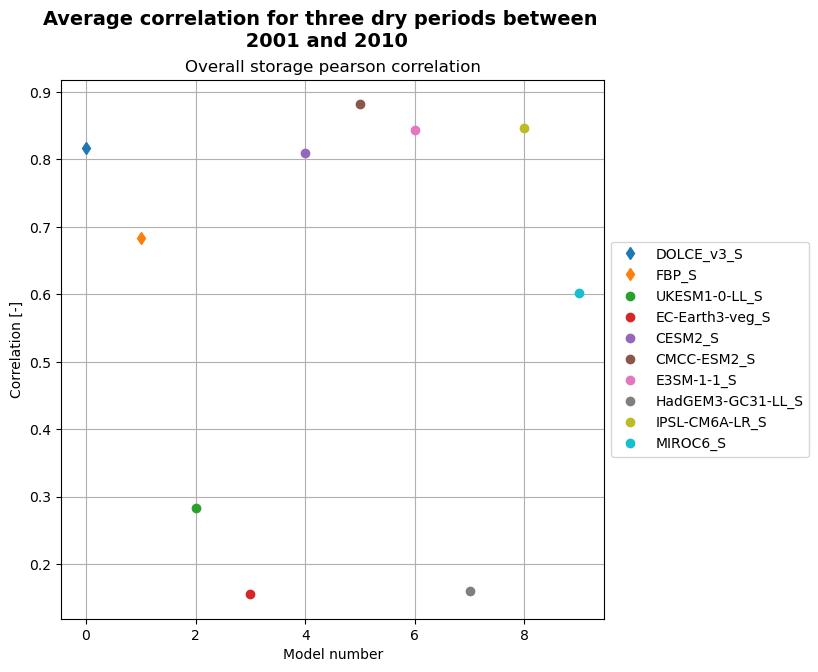

In [23]:
plt.figure(figsize = (7, 7))

label = ['DOLCE_v3_S' , 'FBP_S' ,'UKESM1-0-LL_S' , 'EC-Earth3-veg_S' , 'CESM2_S' , 'CMCC-ESM2_S' , 'E3SM-1-1_S' , 'HadGEM3-GC31-LL_S' , 'IPSL-CM6A-LR_S' , 'MIROC6_S']
ADM = [ADM_DOLCE_v3 , ADM_FBP  , ADM_UKESM1_0_LL , ADM_EC_Earth3_veg , ADM_CESM2 , ADM_CMCC_ESM2 , ADM_E3SM_1_1 , ADM_HadGEM3_GC31_LL , ADM_IPSL_CM6A_LR , ADM_MIROC6]

b3 = np.arange(0 , 36 , 4)
b4 = np.arange(4 , 40 , 4)
p = np.zeros(len(ADM))

for j in range(len(ADM)):
    for i in range(len(b3)):
        x = ADM_SoMo
        y = ADM[j]
        pearsonr = scipy.stats.pearsonr(x, y)
        p[j] += pearsonr[0]
    plt.plot(j , p[j]/len(b3) , marker = marker[j] , label = label[j] , linestyle = (0 , (0 , 100)))
    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Overall storage pearson correlation')
plt.ylabel('Correlation [-]')
plt.xlabel('Model number')
plt.grid()

plt.suptitle('Average correlation for three dry periods between \n 2001 and 2010' , fontsize = 14 ,fontweight = 'bold');
#plt.ylim(0.5 , 0.8);

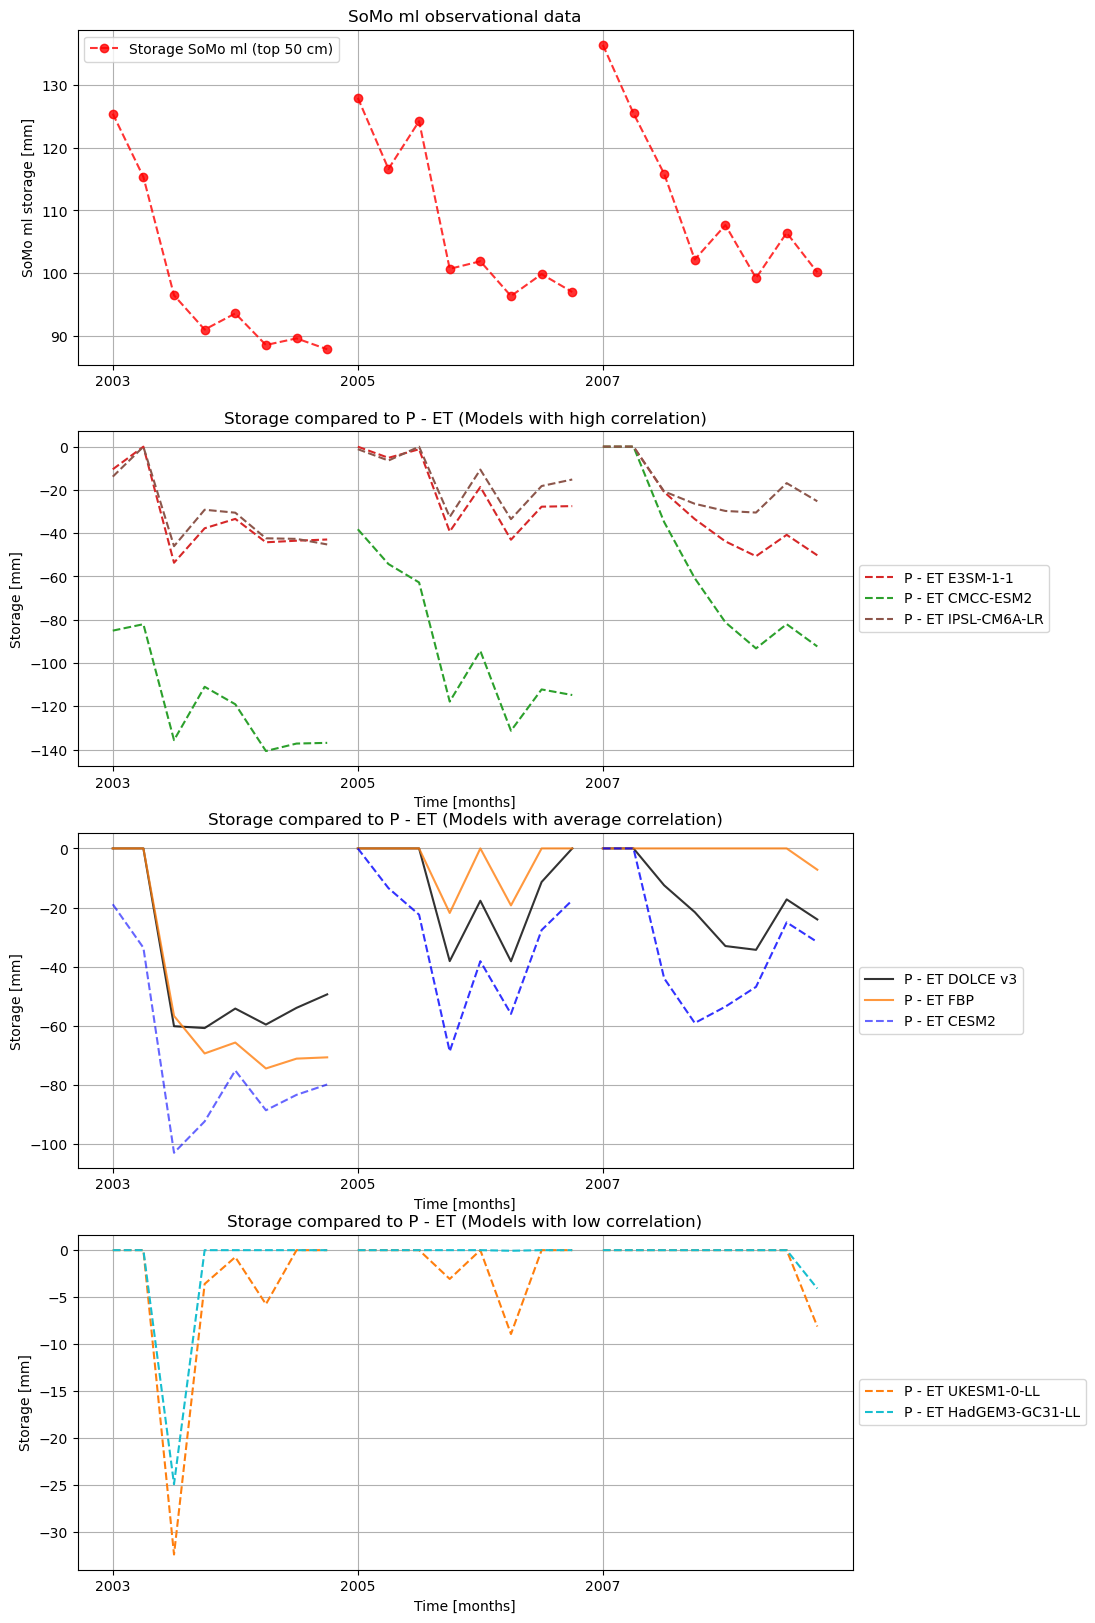

In [24]:
plt.figure(figsize = (10 , 20))
plt.subplot(411)
plt.title('SoMo ml observational data')
plt.plot(ADM_SoMo[0:8] , 'ro--' , alpha = 0.8 , label = 'Storage SoMo ml (top 50 cm)')
plt.plot(np.arange(8 , 16 , 1) , ADM_SoMo[8:16] , 'ro--' , alpha = 0.8)
plt.plot(np.arange(16 , 24 , 1) , ADM_SoMo[16:] , 'ro--' , alpha = 0.8)
plt.xticks( [0 , 8 , 16] ,['2003' , '2005' , '2007'])
plt.ylabel('SoMo ml storage [mm]')
plt.grid()
plt.legend()

"""High"""
plt.subplot(412)
plt.ylabel('Storage [mm]')
#plt.plot(ADM_SoMo , 'ro--' , alpha = 0.8 , label = 'Storage SoMo ml (top 50 cm)')
plt.plot(ADM_E3SM_1_1[0:8] , label = 'P - ET E3SM-1-1', linestyle = 'dashed' , color = 'C3')
plt.plot(np.arange(8 , 16 , 1) , ADM_E3SM_1_1[8:16] , linestyle = 'dashed' , color = 'C3')
plt.plot(np.arange(16 , 24 , 1) , ADM_E3SM_1_1[16:] , linestyle = 'dashed' , color = 'C3')
plt.plot(ADM_CMCC_ESM2[0:8] , label = 'P - ET CMCC-ESM2', linestyle = 'dashed' , color = 'C2')
plt.plot(np.arange(8 , 16 , 1) , ADM_CMCC_ESM2[8:16] , linestyle = 'dashed' , color = 'C2')
plt.plot(np.arange(16 , 24 , 1) , ADM_CMCC_ESM2[16:] , linestyle = 'dashed' , color = 'C2')
plt.plot(ADM_IPSL_CM6A_LR[0:8] , label = 'P - ET IPSL-CM6A-LR', linestyle = 'dashed' , color = 'C5')
plt.plot(np.arange(8 , 16 , 1) , ADM_IPSL_CM6A_LR[8:16] , linestyle = 'dashed' , color = 'C5')
plt.plot(np.arange(16 , 24 , 1) , ADM_IPSL_CM6A_LR[16:] , linestyle = 'dashed' , color = 'C5')

plt.xlabel('Time [months]')
plt.xticks( [0 , 8 , 16] ,['2003' , '2005' , '2007'])
plt.title('Storage compared to P - ET (Models with high correlation)')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

"""Average"""


plt.subplot(413)
plt.ylabel('Storage [mm]')
#plt.plot(ADM_SoMo , 'ro--' , alpha = 0.8 , label = 'Storage SoMo ml (top 50 cm)')
plt.plot(ADM_DOLCE_v3[0:8] , color = 'k' , alpha = 0.8  , label = 'P - ET DOLCE v3' )
plt.plot(np.arange(8 , 16 , 1) , ADM_DOLCE_v3[8:16] , 'k' , alpha = 0.8)
plt.plot(np.arange(16 , 24 , 1) , ADM_DOLCE_v3[16:] , 'k' , alpha = 0.8)
plt.plot(np.arange(8 , 16 , 1) , ADM_FBP[8:16] , 'C1' , alpha = 0.8)
plt.plot(np.arange(16 , 24 , 1) , ADM_FBP[16:] , 'C1' , alpha = 0.8)
plt.plot(ADM_FBP[0:8]  , color = 'C1' , alpha = 0.8  , label = 'P - ET FBP' )
plt.plot(ADM_CESM2[0:8] , label = 'P - ET CESM2' , linestyle = 'dashed' , color = 'blue' , alpha = 0.6)
plt.plot(np.arange(8 , 16 , 1) , ADM_CESM2[8:16] , 'blue' , linestyle = 'dashed' , alpha = 0.8)
plt.plot(np.arange(16 , 24 , 1) , ADM_CESM2[16:] , 'blue' , linestyle = 'dashed' , alpha = 0.8)
#plt.plot(ADM_MIROC6[0:8] , label = 'P - ET IPSL_CM6A_LR' , linestyle = 'dashed' , color = 'C1')
#plt.plot(np.arange(8 , 16 , 1) , ADM_MIROC6[8:16] , color = 'C1' , linestyle = 'dashed' , alpha = 0.8)
#plt.plot(np.arange(16 , 24 , 1) , ADM_MIROC6[16:] , color = 'C1' , linestyle = 'dashed' , alpha = 0.8)
plt.xlabel('Time [months]')
plt.title('Storage compared to P - ET (Models with average correlation)')
plt.grid()
plt.xticks( [0 , 8 , 16] ,['2003' , '2005' , '2007'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

"""Low"""

plt.subplot(414)
plt.ylabel('Storage [mm]')
plt.plot(ADM_UKESM1_0_LL[0:8] , label = 'P - ET UKESM1-0-LL' , linestyle = 'dashed' , color = 'C1')
plt.plot(np.arange(8 , 16 , 1) , ADM_UKESM1_0_LL[8:16] , color = 'C1' , linestyle = 'dashed')
plt.plot(np.arange(16 , 24 , 1) , ADM_UKESM1_0_LL[16:] , color = 'C1' , linestyle = 'dashed')
plt.plot(ADM_HadGEM3_GC31_LL[0:8] , label = 'P - ET HadGEM3-GC31-LL' , linestyle = 'dashed' , color = 'C9')
plt.plot(np.arange(8 , 16 , 1) , ADM_HadGEM3_GC31_LL[8:16] , color = 'C9' , linestyle = 'dashed')
plt.plot(np.arange(16 , 24 , 1) , ADM_HadGEM3_GC31_LL[16:] , color = 'C9' , linestyle = 'dashed')

#plt.plot(ADM_UKESM1_0_LL , color = 'k' , alpha = 0.8  , label = 'P - ET DOLCE v3' )
#plt.plot(ADM_HadGEM3_GC31_LL , label = 'P - ET FBP', linestyle = 'dashed')

plt.xlabel('Time [months]')
plt.xticks( [0 , 8 , 16] ,['2003' , '2005' , '2007'])
plt.title('Storage compared to P - ET (Models with low correlation)')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [25]:
"""Comparing Mrsol to P - ET"""

"""Data"""

home = '/tudelft.net/staff-umbrella/rootzone/LS3MIP/mrsol/Regions/'

CESM2 = xr.open_dataset(home + 'mrsol_Emon_CESM2_land-hist_r1i1p1f1_2001-2010_CU.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'mrsol_Emon_CMCC-ESM2_land-hist_r1i1p1f1_2001-2010_CU.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'mrsol_Emon_HadGEM3-GC31-LL_land-hist_r1i1p1f3_2001-2010_CU.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'mrsol_Emon_IPSL-CM6A-LR_land-hist_r1i1p1f1_2001-2010_CU.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'mrsol_Emon_MIROC6_land-hist_r1i1p1f1_2001-2010_CU.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'mrsol_Emon_UKESM1-0-LL_land-hist_r1i1p1f2_2001-2010_CU.nc' , engine = 'netcdf4')

In [26]:
"""Until max thickness of the layer"""

"""Mrsol"""


t = 120
Mrsol_CESM2_mean = np.zeros(t)
Mrsol_CMCC_ESM2_mean = np.zeros(t)
Mrsol_HadGEM3_GC31_LL_mean = np.zeros(t)
Mrsol_IPSL_CM6A_LR_mean = np.zeros(t)
Mrsol_UKESM1_0_LL_mean = np.zeros(t)
Mrsol_MIROC6_mean = np.zeros(t)

for i in range(t):
    Mrsol_CESM2_mean[i] = CESM2.mrsol[i , 0:20].mean()*20
    Mrsol_CMCC_ESM2_mean[i] = CMCC_ESM2.mrsol[i , 0:9].mean()*15
    Mrsol_HadGEM3_GC31_LL_mean[i] = HadGEM3_GC31_LL.mrsol[i , 0:4].mean() * 4
    Mrsol_IPSL_CM6A_LR_mean[i] = IPSL_CM6A_LR.mrsol[i , 0:11].mean() * 11
    Mrsol_MIROC6_mean[i] = MIROC6.mrsol[i , 0:6].mean() * 6
    Mrsol_UKESM1_0_LL_mean[i] = UKESM1_0_LL.mrsol[i , 0:4].mean() * 4

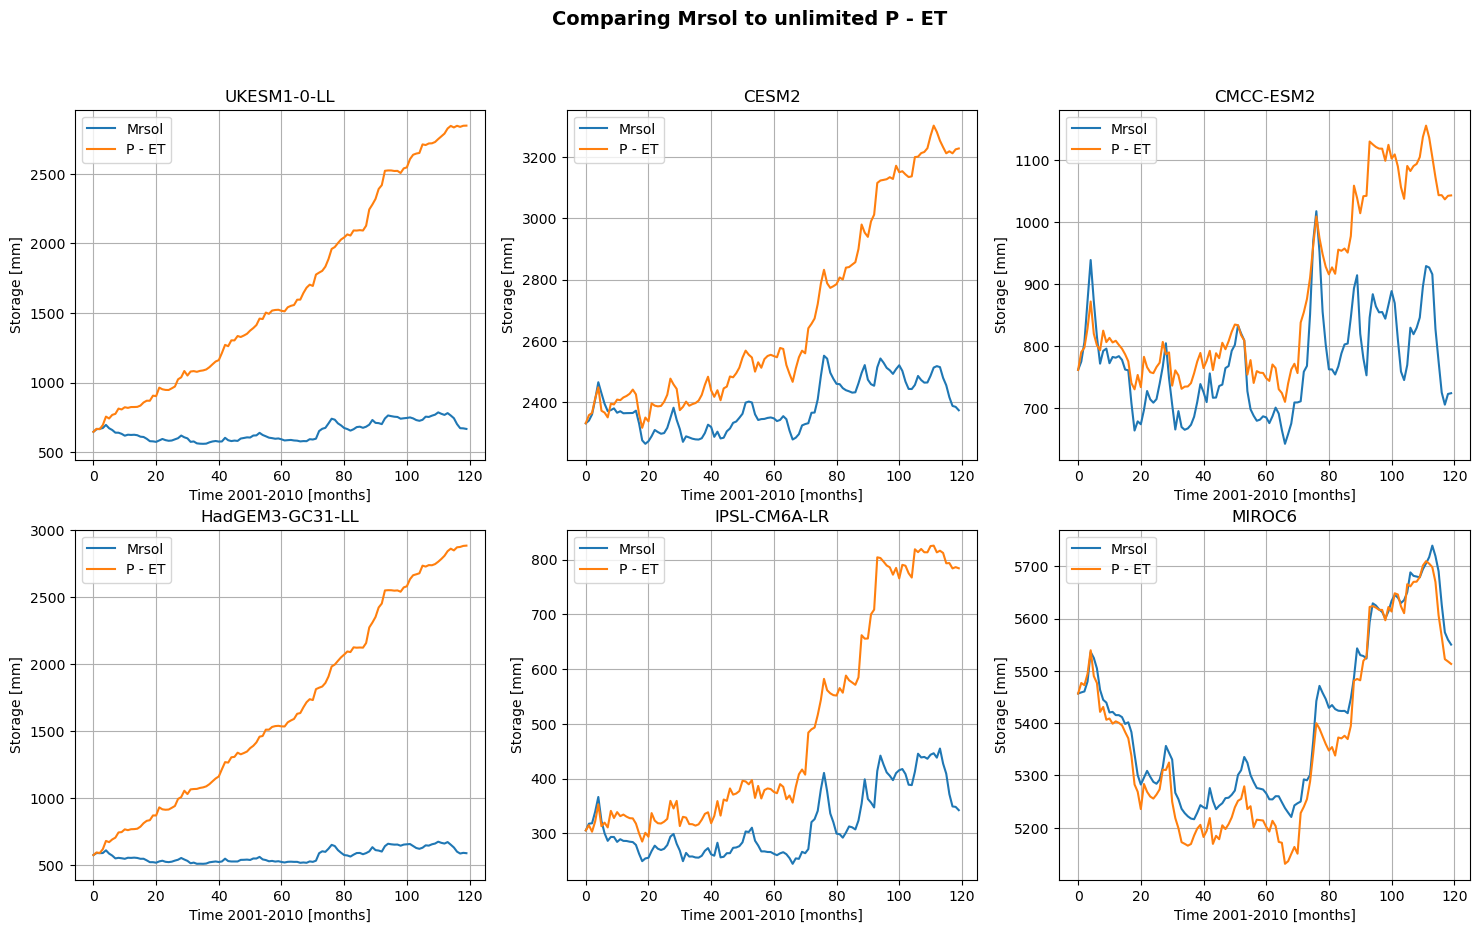

In [27]:
"""Storage"""

#At t = 0 setting the storage even with the mrsol data


t = 120

S1_UKESM1_0_LL = np.zeros(t)
S1_CESM2 = np.zeros(t)
S1_CMCC_ESM2 = np.zeros(t)
S1_HadGEM3_GC31_LL = np.zeros(t)
S1_IPSL_CM6A_LR = np.zeros(t)
S1_MIROC6 = np.zeros(t)

for i in range(t):
    S1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[i - 1] + (P_mean[i] - ET_mean_UKESM1_0_LL[i])
    S1_CESM2[i] = S1_CESM2[i - 1] + (P_mean[i] - ET_mean_CESM2[i])
    S1_CMCC_ESM2[i] = S1_CMCC_ESM2[i - 1] + (P_mean[i] - ET_mean_CMCC_ESM2[i])
    S1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[i - 1] + (P_mean[i] - ET_mean_HadGEM3_GC31_LL[i])
    S1_IPSL_CM6A_LR[i] =  S1_IPSL_CM6A_LR[i - 1] + (P_mean[i] - ET_mean_IPSL_CM6A_LR[i])
    S1_MIROC6[i] = S1_MIROC6[i - 1] + (P_mean[i] - ET_mean_MIROC6[i])
    
    S1_UKESM1_0_LL[0] = Mrsol_UKESM1_0_LL_mean[0]
    S1_CESM2[0] = Mrsol_CESM2_mean[0]
    S1_CMCC_ESM2[0] = Mrsol_CMCC_ESM2_mean[0]
    S1_HadGEM3_GC31_LL[0] = Mrsol_HadGEM3_GC31_LL_mean[0]
    S1_IPSL_CM6A_LR[0] = Mrsol_IPSL_CM6A_LR_mean[0]
    S1_MIROC6[0] = Mrsol_MIROC6_mean[0]
     
label = ['UKESM1-0-LL' , 'CESM2' , 'CMCC-ESM2' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']
S1 = [S1_UKESM1_0_LL  , S1_CESM2, S1_CMCC_ESM2 , S1_HadGEM3_GC31_LL , S1_IPSL_CM6A_LR , S1_MIROC6]
Mrsol = [Mrsol_UKESM1_0_LL_mean , Mrsol_CESM2_mean , Mrsol_CMCC_ESM2_mean , Mrsol_HadGEM3_GC31_LL_mean , Mrsol_IPSL_CM6A_LR_mean , Mrsol_MIROC6_mean]
    
plt.figure(figsize = (18 , 10))

for i in range(len(S1)):
    plt.subplot(2 , 3 , i + 1)
    plt.title(label[i])
    plt.plot(Mrsol[i] , label = 'Mrsol')
    plt.ylabel('Storage [mm]')
    plt.xlabel('Time 2001-2010 [months]')
    plt.grid()
    plt.plot(S1[i] , label = 'P - ET')
    
    plt.legend()
    
plt.suptitle('Comparing Mrsol to unlimited P - ET' , fontsize = 14 , fontweight = 'bold');